## Введение

Перед началом анализа мы загрузим **данные о популярных песнях на платформе Spotify с сайта kaggle** и выполним их первичную обработку.
Нас интересует, **как танцевальность треков зависит от лада (мажор/минор), определить песни, подходящие для пробежек в разных пульсовых зонах на основе темпа (BPM)**, а также **как менялось количество треков и их популярность среди пользователей**.

**Наша главная цель - создать классный плейлист для забега Лизы и Миши в Казани предстоящей весной. Спасите Машу от этих спортиков. 🙏🙏🙏** 

Импортируем библиотеки и чекаем датасет. 

*В текстовом редакторе была проверена кодировка датасета, так как стандартная utf-8 не подошла.*

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [65]:
import csv

with open('spotify_songs1.csv', encoding='ISO-8859-1') as f:
    reader = csv.DictReader(f)
    songs = list(reader)
    
print('Количество песен:', len(songs))
print('Пример записи:')
print(songs[0])

Количество песен: 952
Пример записи:
{'track_name;artist(s)_name;artist_count;released_year;released_month;released_day;in_spotify_playlists;in_spotify_charts;streams;in_apple_playlists;in_apple_charts;in_deezer_playlists;in_deezer_charts;in_shazam_charts;bpm;key;mode;danceability_%;valence_%;energy_%;acousticness_%;instrumentalness_%;liveness_%;speechiness_%': 'Que Vuelvas;Carin Leon', None: [' Grupo Frontera;2;2022;12;9;763;26;2762;21;110;21;9;71;162;A#;Major;49;78;64;19;0;11;4']}


## Теперь посмотрим топ 10 песен по популярности. Узнаем, что новенького и вкусненького можно добавить к себе в плейлист 🤌

Начнем обрабатывать файл сразу, так как данные достаточно чистые, единственное нужно проверять на пропуски



In [1]:
import pandas as pd

# Loading data
df = pd.read_csv('spotify_songs1.csv', encoding='ISO-8859-1', sep=';')

# Take the necessary columns and sort by streams
top_songs = df[['track_name', 'artist(s)_name', 'streams']].sort_values('streams', ascending=False).head(10)

print("Топ-10 песен по количеству прослушиваний:\n")
for i in range(len(top_songs)):
    song = top_songs.iloc[i]
    print(f"{i+1}. {song['track_name']} — {song['artist(s)_name']} ({song['streams']} прослушиваний)")

Топ-10 песен по количеству прослушиваний:

1. Love Grows (Where My Rosemary Goes) — Edison Lighthouse (BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3 прослушиваний)
2. Anti-Hero — Taylor Swift (999748277 прослушиваний)
3. Arcade — Duncan Laurence (991336132 прослушиваний)
4. Glimpse of Us — Joji (988515741 прослушиваний)
5. Seek & Destroy — SZA (98709329 прослушиваний)
6. Summertime Sadness — Lana Del Rey (983637508 прослушиваний)
7. Come Back Home - From "Purple Hearts" — Sofia Carson (97610446 прослушиваний)
8. Where Are You Now — Lost Frequencies, Calum Scott (972509632 прослушиваний)
9. I Love You So — The Walters (972164968 прослушиваний)
10. Queencard — (G)I-DLE (96273746 прослушиваний)


## Узнаем какие артисты упоминаются чаще всего в нашем датасете.
Поймем, по кому больше всего будут сохнуть Миша и Лиза во время забега 🏃‍♀️‍➡️🏃‍♂️‍➡️


In [2]:
# Count the number of mentions of each artist
artist_counts = df['artist(s)_name'].value_counts().head(10)

# Listing the top 10 artists
print("Топ-10 артистов по количеству упоминаний:\n")
for i, (artist, count) in enumerate(artist_counts.items(), start=1):
    print(f"{i}. {artist} — {count} упоминаний")

Топ-10 артистов по количеству упоминаний:

1. Taylor Swift — 34 упоминаний
2. The Weeknd — 22 упоминаний
3. Bad Bunny — 19 упоминаний
4. SZA — 19 упоминаний
5. Harry Styles — 17 упоминаний
6. Kendrick Lamar — 12 упоминаний
7. Morgan Wallen — 11 упоминаний
8. Ed Sheeran — 9 упоминаний
9. Feid — 8 упоминаний
10. Drake, 21 Savage — 8 упоминаний


## Теперь посмотрим с какого года начинаются песни в датасете и поймем, будут ли плакать от ностальгии ребята 💔

In [3]:
# Determining the minimum year
first_year = int(df['released_year'].min())

print(f"Данные начинаются с {first_year} года.")

Данные начинаются с 1930 года.


Если кто-то из них вампир 🥀🧛‍♀️🧛‍♂️, то им понравится 

## Теперь ради интереса посмотрим, сколько песен было выпущено в каком году


In [4]:
# Identify the column with the year
if 'released_year' in df.columns:
    year_column = 'released_year'
elif 'year' in df.columns:
    year_column = 'year'
else:
    raise ValueError("В датасете нет столбца с годом выпуска.")

# counting the number of songs by year
songs_per_year = df[year_column].value_counts().sort_index()

print("Количество песен по годам:\n")
for year, count in songs_per_year.items():
    print(f"{int(year)} — {count} песен")

Количество песен по годам:

1930 — 1 песен
1942 — 1 песен
1946 — 1 песен
1950 — 1 песен
1952 — 1 песен
1957 — 2 песен
1958 — 3 песен
1959 — 2 песен
1963 — 3 песен
1968 — 1 песен
1970 — 2 песен
1971 — 1 песен
1973 — 1 песен
1975 — 2 песен
1979 — 1 песен
1982 — 2 песен
1983 — 1 песен
1984 — 4 песен
1985 — 2 песен
1986 — 2 песен
1987 — 1 песен
1991 — 2 песен
1992 — 1 песен
1994 — 1 песен
1995 — 2 песен
1996 — 1 песен
1997 — 1 песен
1998 — 1 песен
1999 — 5 песен
2000 — 4 песен
2002 — 6 песен
2003 — 2 песен
2004 — 4 песен
2005 — 1 песен
2007 — 1 песен
2008 — 2 песен
2010 — 7 песен
2011 — 10 песен
2012 — 10 песен
2013 — 13 песен
2014 — 13 песен
2015 — 11 песен
2016 — 18 песен
2017 — 23 песен
2018 — 10 песен
2019 — 36 песен
2020 — 37 песен
2021 — 119 песен
2022 — 402 песен
2023 — 175 песен


Большинство популярных песен было выпущено после нашего рождения, надеемся, они нормальные. 

*Маша: - учитывая их активность и жизнерадостность, они не могут быть людьми. Значит, Тейлор Свифт и Викенд будут их раздражать, а вот если бы там был Михаил Круг...*

## Отсртируем данные по значениям BPM 🫀🫀🫀

Значения нужно отсортировать по пульсовым зонам, где: 
зона 1 - 135-146
зона 2 - 146-157
зона 3 - 157-168
зона 4 - 168-179
зона 5 - 179-191

Посмотрим сколько песен есть в какой пульсовой зоне и на сколько спотифай ориентирован на развитие левого желудочка у атлетов 🫀🫀💦💦💦 (читать у Мишы и Лизы).

Количество песен по пульсовым зонам:

Зона 1 (135–146): 117 песен
Зона 2 (146–157): 67 песен
Зона 3 (157–168): 38 песен
Зона 4 (168–179): 55 песен
Зона 5 (179–191): 21 песен
Вне зон: 654 песен


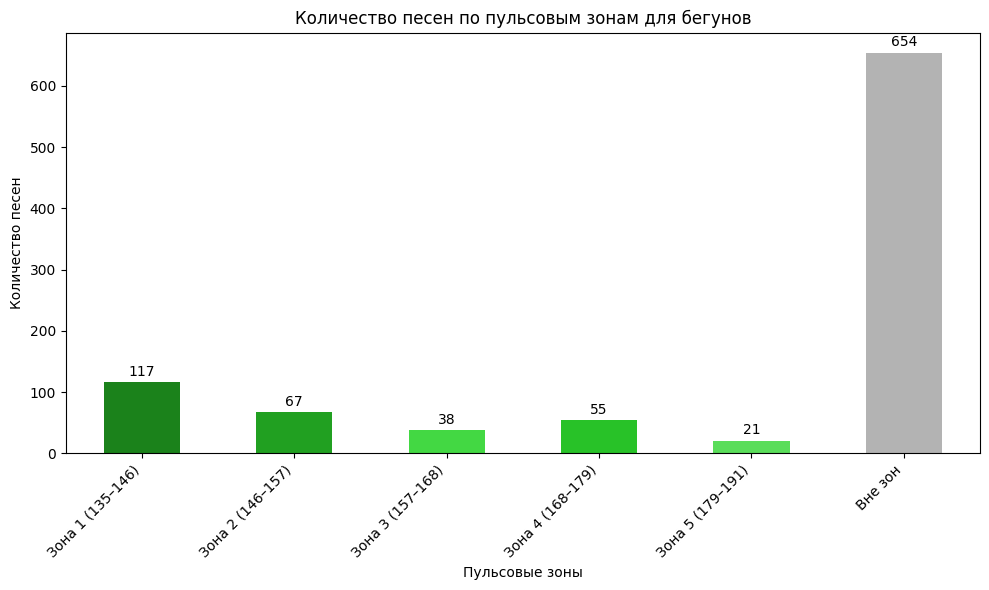

In [75]:
# Function to determine the pulse zone by BPM
def get_zone(bpm):
    if 135 <= bpm < 146:
        return "Зона 1 (135–146)"
    elif 146 <= bpm < 157:
        return "Зона 2 (146–157)"
    elif 157 <= bpm < 168:
        return "Зона 3 (157–168)"
    elif 168 <= bpm < 179:
        return "Зона 4 (168–179)"
    elif 179 <= bpm <= 191:
        return "Зона 5 (179–191)"
    else:
        return "Вне зон"

# Apply the function to all songs
df['pulse_zone'] = df['bpm'].apply(get_zone)

# Counting the number of songs by zones
zone_counts = df['pulse_zone'].value_counts()

# Sort by zone numbers (to display in order from 1 to 5)
order = ["Зона 1 (135–146)", "Зона 2 (146–157)", "Зона 3 (157–168)", "Зона 4 (168–179)", "Зона 5 (179–191)", "Вне зон"]
zone_counts = zone_counts.reindex(order, fill_value=0)

print("Количество песен по пульсовым зонам:\n")
for zone, count in zone_counts.items():
    print(f"{zone}: {count} песен")
import matplotlib.pyplot as plt

# Creating a bar chart based on the zone_counts data
plt.figure(figsize=(10, 6))
zone_counts.plot(kind='bar', color=['#1B821B', '#21A021', '#43D843', '#28C228', '#5ADD5A', '#B3B3B3'])
plt.title('Количество песен по пульсовым зонам для бегунов')
plt.xlabel('Пульсовые зоны')
plt.ylabel('Количество песен')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Adding value labels on the columns
for i, count in enumerate(zone_counts):
    plt.text(i, count + 10, str(count), ha='center')

plt.show()

**🫀Мммммм, слышим эти 38 песен и наше сердце ускоряется ровно до нужной нам 3 зоны для бега🫀**

*Маша: если в среднем продолжительность песни 3 мин 17 сек (по гуглу), то 21 км они должны пробежать примерно за 2 часа, ха-ха-ха. По их словам, они планируют пробежать их за 1 час 50 минут, так что плейлиста не хватит.*

## Посмотрим на среднюю энергичность песен по годам

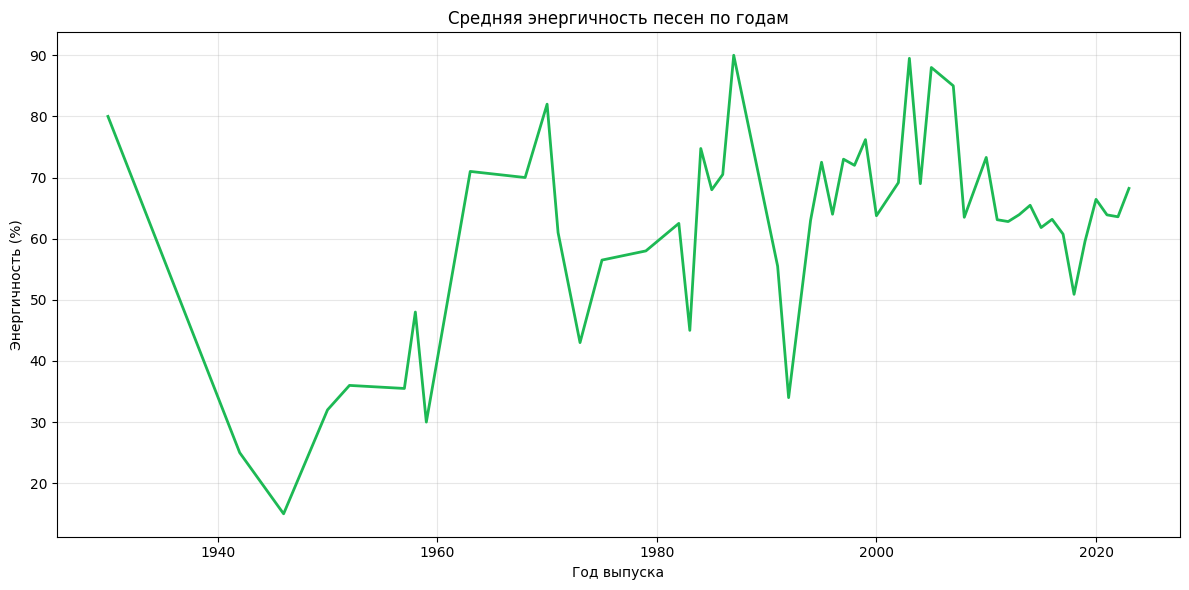

In [77]:
# Group by year and calculate the average energy level
energy_by_year = df.groupby("released_year")["energy_%"].mean()

# Building a line graph
plt.figure(figsize=(12, 6))
energ_by_year.plot(color='#1DB954', linewidth=2)
plt.title('Средняя энергичность песен по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Энергичность (%)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

**2010-е рулят, ееееее**

## Ура, fancy-плейлисту быть💅💅💅